# Метод k-ближайших соседей (k-nearest neighbors algorithm)

## Задание 1
Реализуйте алгоритм K ближайших соседей для классификации. 
- Создайте искуственный набор данных из 100 наблюдений с 3 классами.
- Реализуйте функцию, которая получает на вход тренировочный и тестовый наборы данных и $k$ - количество ближайших соседей, и возвращает метки тестового набора данных
- Используйте евклидову меру
- Если возникает неопределенность (например, все три соседа имею разные метки классов), то присвойте класс случайным образом
- Проверьте качество классификации для различных параметров $k$ (1, 3, 5, 7, 9) метрикой Accuracy (доля правильных ответов)
- Постройте разделающие поверхности классификатора

**Алгоритм К-ближайших соседей:**

Для каждого объекта тестового набора данных:
1. вычисление расстояний между всеми объектами тренировочного набора;
2. определение $k$ наименьших расстояний;
3. определение классов для $k$ найденных объектов;
4. присваивание метки тестовому объекту класса, который превалирует среди найденных объектов.

In [4]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

Дано 3 класса:

In [13]:
X, y = make_blobs(n_samples=100, centers=3, n_features=2, random_state=15)

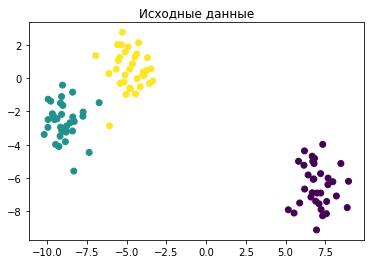

In [16]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.title('Исходные данные');